In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [ ]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados

# Desafio 01 - Investigar por que a classe tratamento é tão desbalanceada?

In [3]:
dados.tratamento.value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

A classe tratamento é desbalanceado, porque os experiementos podem ser realizados com diferentes dosagens de droga e em diferente tempos, porém o controle não possui tantas variações.

# Desafio 02 - Plotar as 5 últimas linhas da tabela

In [ ]:
dados.iloc[-5:]

In [ ]:
dados.tail()

# Desafio 03 - Proporção das classes tratamento.

In [57]:
proporcao_tratamento = dados['tratamento'].value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
proporcao_tratamento 

com_droga       92.16%
com_controle     7.84%
Name: tratamento, dtype: object

# Desafio 04 - Quantas tipos de drogas foram investigados.

In [123]:
drogas_analizadas = len(dados['droga'].value_counts())
print(f'Foram analizadas {drogas_analizadas} drogas no experimento')

Foram analizadas 3289 drogas no experimento


# Desafio 06 - Renomear as colunas tirando o hífen.

*metodo mais rápido, contudo indiscriminado*

In [ ]:
dados.columns = [coluna.replace('-', '') for coluna in dados.columns]
dados.head()

*método mais extenso, porém mais direcionado*

In [ ]:
rename_column = []
for c in colunas:
  sep = c.split('-')
  rename_column.append(''.join(sep))

colunas_novas = dict(zip(colunas,rename_column))

dados.rename(columns=colunas_novas, inplace= True)

dados.head()

# Desafio 07 - Deixar os gráficos bonitões. (Matplotlib.pyplot)

In [ ]:
drogas = dados.droga.value_counts().index[:5]
drogas_mais = dados.query('droga in @drogas')

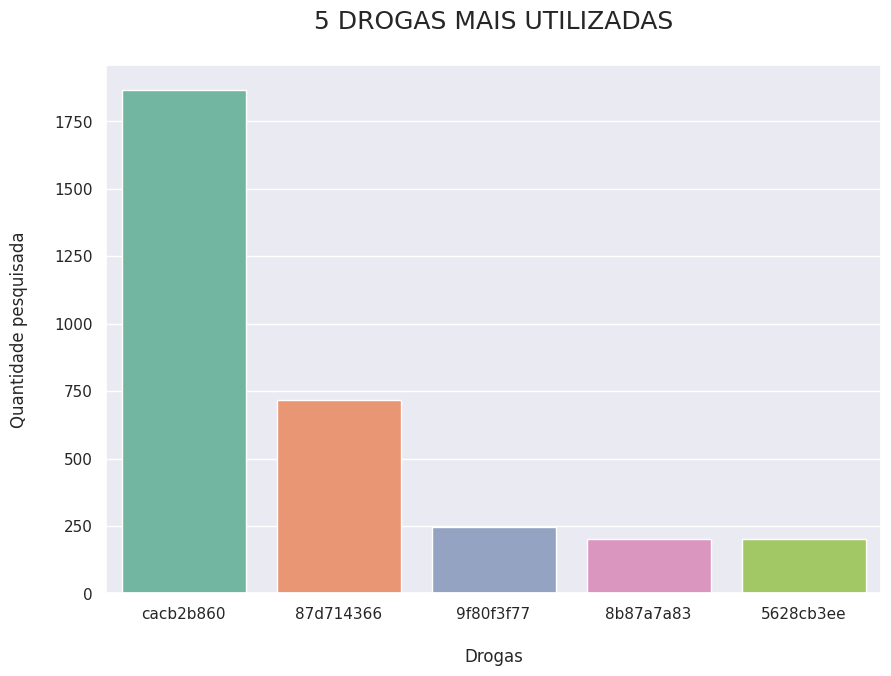

In [88]:
plt.figure(figsize=(10,7), dpi=100)
ax = sns.countplot(x = 'droga', data=drogas_mais, order = drogas, palette=sns.color_palette('Set2'))
ax.set_title('5 DROGAS MAIS UTILIZADAS\n',fontsize= 18)
ax.set_xlabel('\nDrogas')
ax.set_ylabel('Quantidade pesquisada\n')
plt.show()

In [25]:
tratamento = dados.tratamento.value_counts()

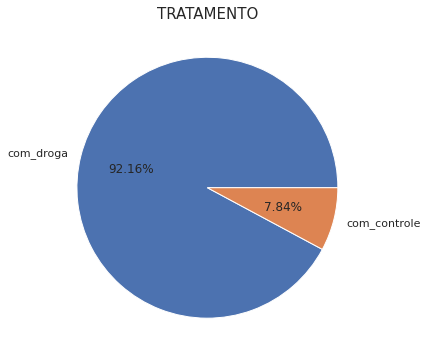

In [58]:
ax = plt.subplots(figsize = (8,6))
title = dados.keys()[1].upper()
label = dados['tratamento'].unique()
plt.pie(x=tratamento, labels=label, autopct="%.2f%%", colors=)
plt.title(title,fontsize=15)
plt.show()

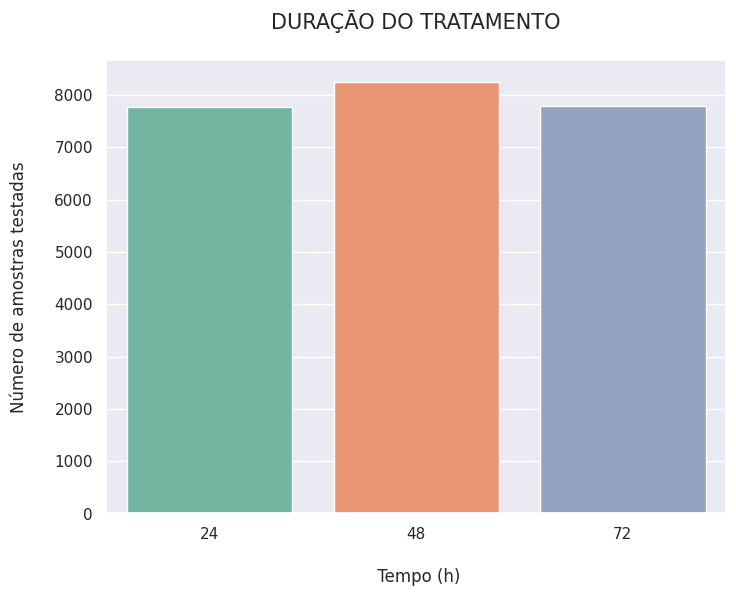

In [87]:
# tempos = dados['tempo'].unique()
plt.figure(figsize=(8,6), dpi = 100)
ax = sns.countplot(x='tempo', data=dados, palette=sns.color_palette('Set2'))
ax.set_title('DURAÇĀO DO TRATAMENTO\n', fontsize=15)
ax.set_xlabel('\n Tempo (h)')
ax.set_ylabel('Número de amostras testadas\n ')
plt.show()

# Desafio 08: Resumo do que você aprendeu com os dados

In [112]:
mais_utilizadas = sum(dados['droga'].value_counts().unique()[:5])
todas_drogas = sum(dados['droga'].value_counts().unique())

In [118]:
print(f'As 5 drogas mais utilizadas representam {((mais_utilizadas/todas_drogas)*100).round(2)}% do experimento realizado')

As 5 drogas mais utilizadas representam 78.67% do experimento realizado



> As 5 drogas mais utilizadas representam 78.67% do experimento realizado

> Do total de experimento: 92.16% foram utilizados drogas, enquanto em 7.84% foram os controles dos experimentos.

> Descobri que existem diferentes métodos para poder renomear as colunas de um DataFrame.

> Escolher a melhor visualização para seu conjunto de dados pode te ajudar a inferir resultados que de outra forma seriam mais difíceis.

> Os tempos de exposicão das drogas nas celulas foram similares para 24, 48 e 72 horas.





